In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

In [2]:
x1 = None
x2 = None
y1 = None
y2 = None

In [78]:
filename = 'CVD.csv'
df = pd.read_csv(filename, delimiter=',', decimal=',')
filename = 'CVD-2.csv'
df2 = pd.read_csv(filename, delimiter=',', decimal=',')

In [79]:
ydata = df.mA
xdata = df.V
ydata2= df2.mA
xdata2 = df2.V

In [80]:
plt.rcParams['figure.dpi'] = 300

style_scatter = '.r'
style_line = '--.k'

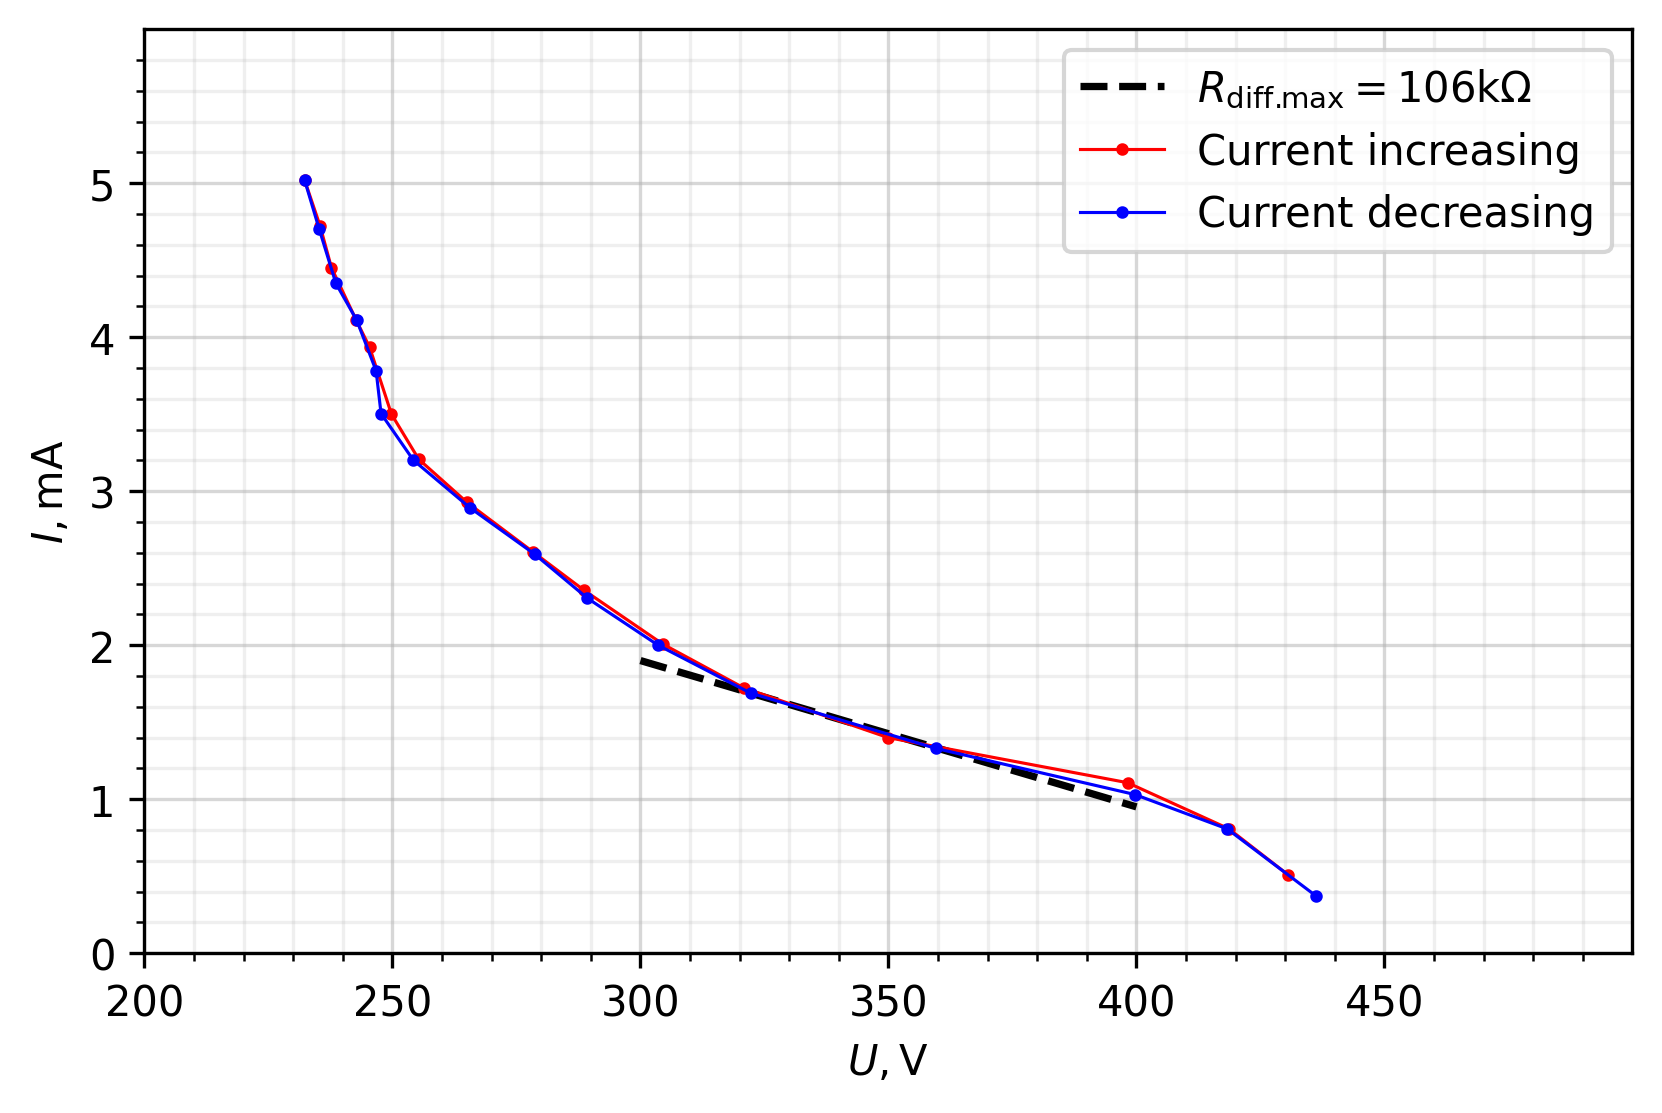

In [81]:
fig = plt.figure(figsize=(6.4, 4.0))
ax = fig.add_subplot(111)
ax.set_ylim((0, 6))
ax.set_xlim((200, 500))
ax.set_ylabel(r'$I, \mathrm{mA}$')
ax.set_xlabel(r'$U, \mathrm{V}$')

ax.set_yticks(np.arange(0, 6, 1))
ax.set_yticks(np.arange(0, 6, 0.2), minor=True)
ax.set_xticks(np.arange(200, 500, 10), minor=True)
ax.set_xticks(np.arange(200, 500, 50))

ax.plot((300, 400), (1.9, .95), '--k', lw=1.75, label=r'$R_\text{diff.max} = 106 \mathrm{k\Omega}$')
ax.plot(xdata, ydata, '-or', ms=2, lw=.75, label='Current increasing')
ax.plot(xdata2, ydata2, '-ob', ms=2, lw=.75, label='Current decreasing')



ax.grid(which='major', alpha=0.5)
ax.grid(which='minor', alpha=0.2)

ax.legend()

In [116]:
filename = '5mA.csv'
df = pd.read_csv(filename, delimiter=',', decimal=',')
filename = '3mA.csv'
df2 = pd.read_csv(filename, delimiter=',', decimal=',')
filename = '1_5mA.csv'
df3 = pd.read_csv(filename, delimiter=',', decimal=',')

In [117]:
ydata = df.uA
xdata = df.V
ydata2 = df2.uA
xdata2 = df2.V
ydata3 = df3.mA
xdata3 = df3.V

In [130]:
curve = lambda x, A, B, C, D: A*np.tanh(B*x) + C*x + D
popt1, pcov1 = curve_fit(curve, xdata, ydata)
popt2, pcov2 = curve_fit(curve, xdata2, ydata2)
popt3, pcov3 = curve_fit(curve, xdata3, ydata3)

array([ 0.02244777,  0.02349632,  0.08869591, -0.02362883])

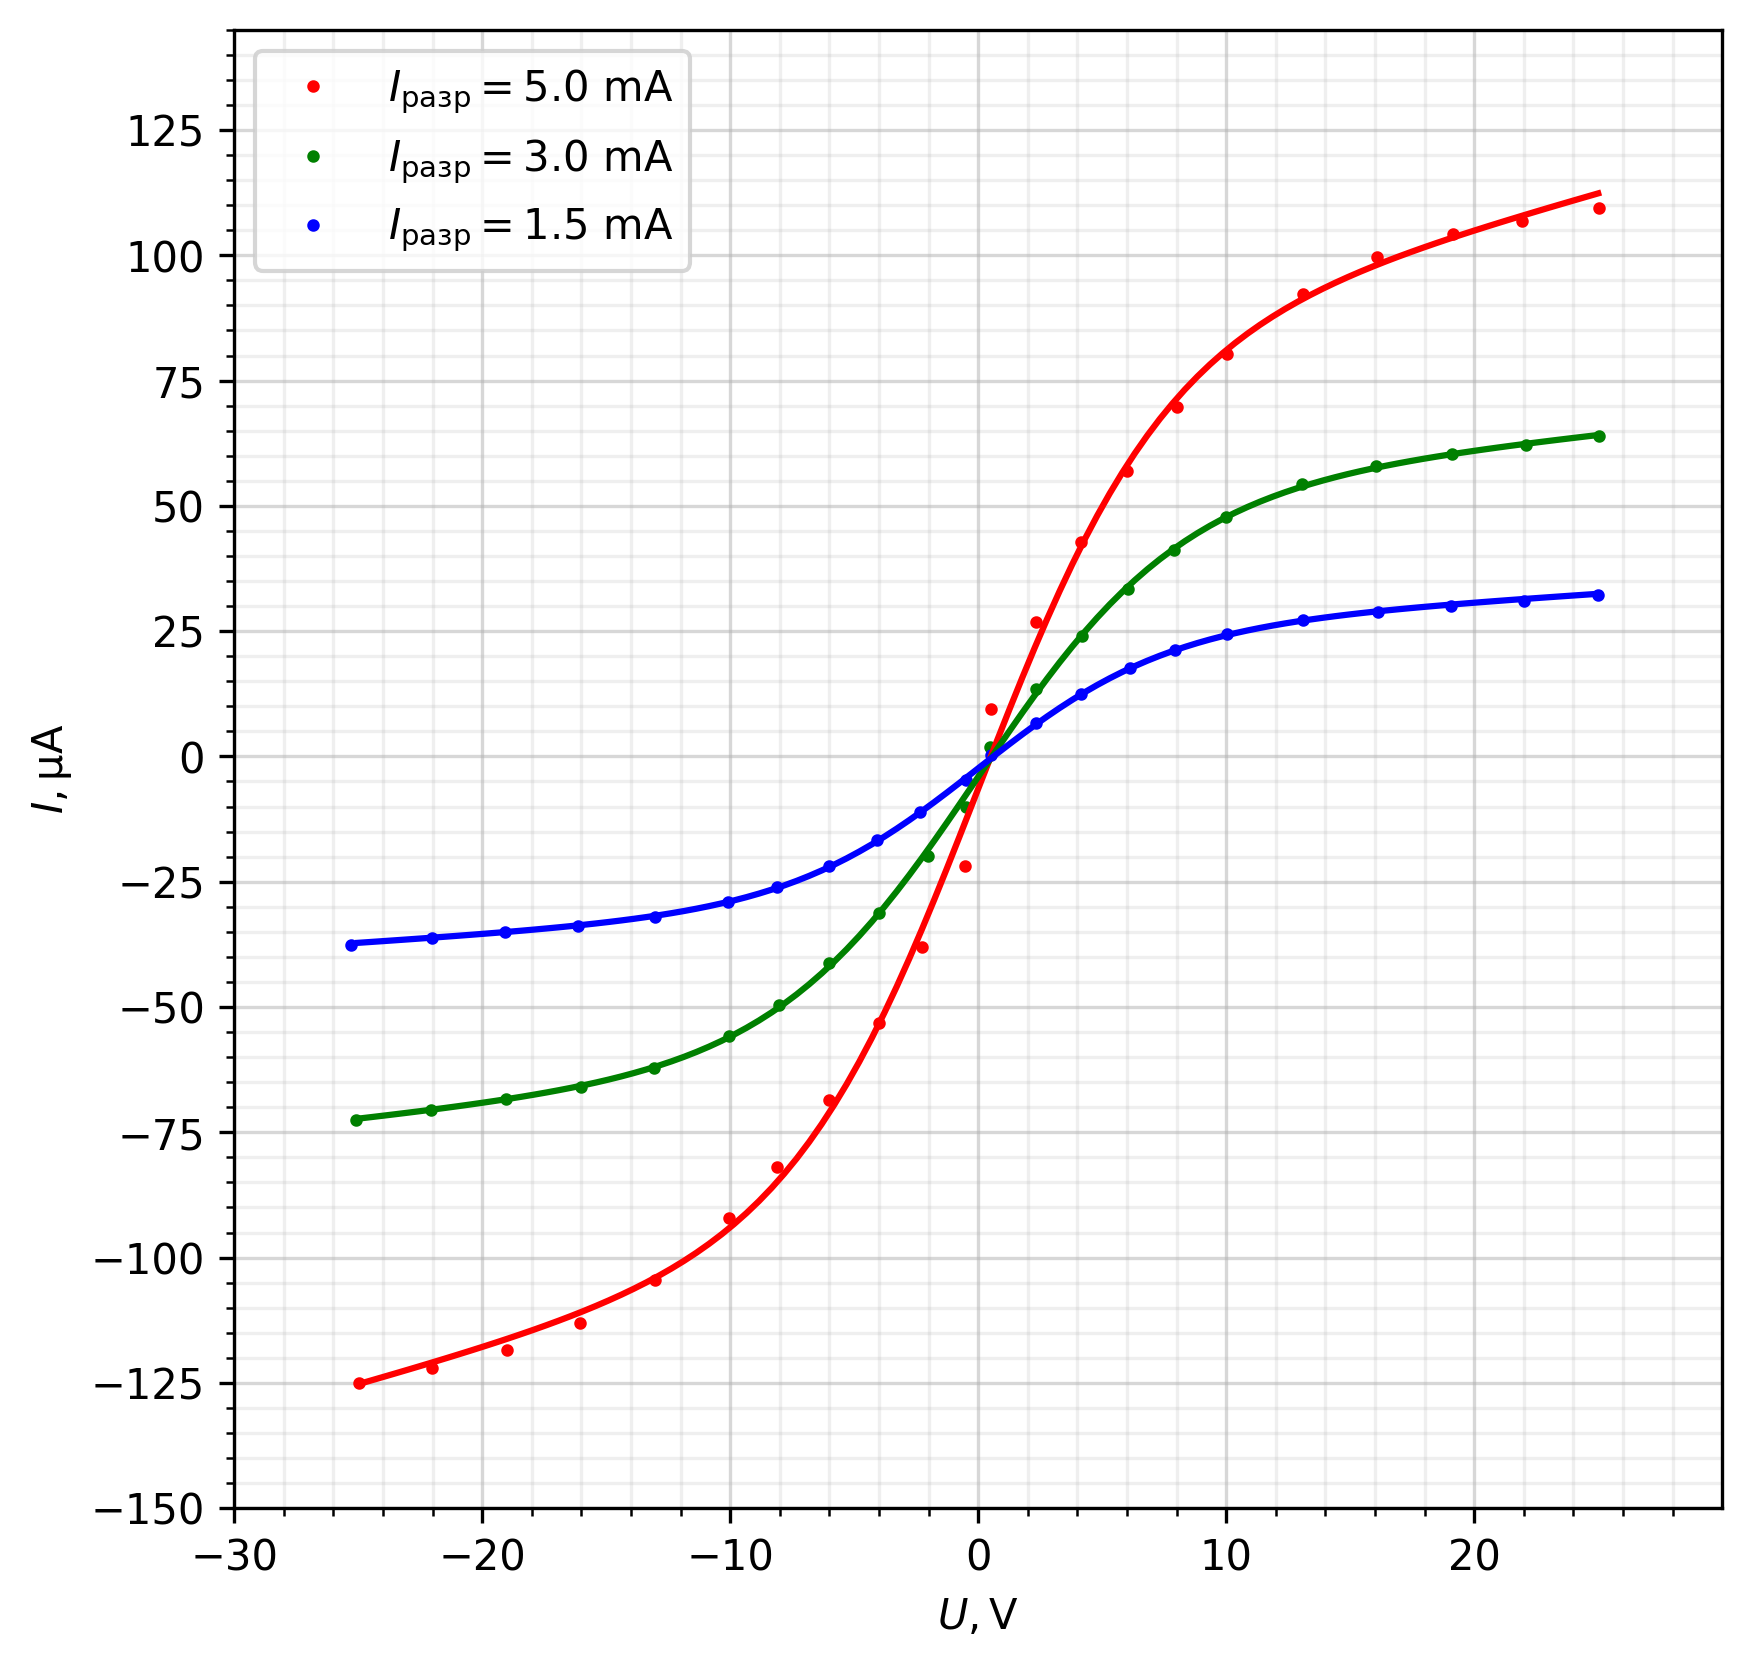

In [134]:
fig = plt.figure(figsize=(6.4, 6.4))
ax = fig.add_subplot(111)
ax.set_ylim((-140, 140))
ax.set_xlim((-30, 30))
ax.set_ylabel(r'$I, \mathrm{\mu A}$')
ax.set_xlabel(r'$U, \mathrm{V}$')

ax.set_yticks(np.arange(-150, 150, 25))
ax.set_yticks(np.arange(-150, 150, 5), minor=True)
ax.set_xticks(np.arange(-30, 30, 2), minor=True)
ax.set_xticks(np.arange(-30, 30, 10))

ax.plot(xdata, ydata, 'or', ms=2, lw=.75, label=r'$I_\text{разр} = \mathrm{5.0~mA}$')
ax.plot(xdata2, ydata2, 'og', ms=2, lw=.75, label=r'$I_\text{разр} = \mathrm{3.0~mA}$')
ax.plot(xdata3, ydata3, 'ob', ms=2, lw=.75, label=r'$I_\text{разр} = \mathrm{1.5~mA}$')

ls = np.linspace(-25, 25, 100)
ax.plot(ls, curve(ls, popt1[0], popt1[1], popt1[2], popt1[3]), '-r')
ax.plot(ls, curve(ls, popt2[0], popt2[1], popt2[2], popt2[3]), '-g')
ax.plot(ls, curve(ls, popt3[0], popt3[1], popt3[2], popt3[3]), '-b')



ax.grid(which='major', alpha=0.5)
ax.grid(which='minor', alpha=0.2)

ax.legend()

np.sqrt(np.diag(pcov3)) / popt3

In [137]:
print(popt1)
print(np.sqrt(np.diag(pcov1)))
print(popt2)
print(np.sqrt(np.diag(pcov2)))
print(popt3)
print(np.sqrt(np.diag(pcov3)))

[84.87483174  0.13336693  1.3658654  -6.45190971]
[8.4573215  0.01404028 0.39304666 0.79234486]
[55.59911524  0.12204153  0.51411882 -4.06652716]
[2.46531726 0.00527827 0.11063509 0.19466125]
[27.00810059  0.13166976  0.31552122 -2.36884271]
[0.60627172 0.00309375 0.02798544 0.05597297]
